# Project Overview

The American prison system was never capable of handling the task they are believed to be handling because they were designed by the same people who wrote “All people are considered equal” without considering anyone of color as people.

In [4]:
# importing libraries
import pandas as pd
import numpy as np 
import requests
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
 
from urllib.request import urlopen
from bs4 import BeautifulSoup # pip install beautifulsoup4
from tabulate import tabulate # pip install tabulate
# pip install lmxl

# Problem Description
The prison system is designed to increase the gap between racial classes by oppressing those of color.

# Subject Matter Expertise
 
1. Statistics and Probability
2. Data Visualization
3. Data Analysis


# Assumptions
Anyone who filed under Hispanic descent will not be counted as white.

There isn't a significant enough change in population from 2014 and 2016 to consider the data as 'old'.

# Steps to Explore the Topic and Problem

1. Download data consisting of general and in prison populations
2. Webscrape for the more specific state populations
3. Compare the ratios of those in and out based on race
4. Analyze the change in numbers over years
5. Compare the amount of convictions between the races
6. Determine the likelyhood of being arrested out of selected amount of people [100]
7. Conclude why it looks as though groups are being targeted

# Data Sources:

1. Prison Population over the Years by Race 'https://www.bjs.gov/index.cfm?ty=pbse&sid=40'

2. VA Population by Race 'https://censusreporter.org/data/table/?table=B03002&primary_geo_id=04000US51&geo_ids=04000US51,01000US#'

3. Virginia Demographics 'https://www.virginia-demographics.com/counties_by_population'

4. Prison Policy "https://www.prisonpolicy.org/reports/education.html"

5. USA Demographics 'https://en.wikipedia.org/wiki/Historical_racial_and_ethnic_demographics_of_the_United_States'

In [47]:
# US prison population over the years by race
race = pd.read_csv("p18t03.csv",encoding='cp1252')

# US v VA diversity comparison in 2016
diversity = pd.read_csv("VA Population by Race.csv", encoding='cp1252')

VAdemographics_url = "https://www.virginia-demographics.com/counties_by_population"

prisonpolicy_url = "https://www.prisonpolicy.org/reports/education.html"

USdemographics_url = "https://en.wikipedia.org/wiki/Historical_racial_and_ethnic_demographics_of_the_United_States"

# Data Exploration
There hasn't been a significant enough change in numbers when comparing the graphs. This would suggest that whatever measures are or aren't being implemented have provided no results in progressing or transforming the corrupted prison system.

# Data Cleaning

Downloading csv files or converting spreadsheets to csvs brought up formatting issues that I cleaned up by using the .drop() method to remove columns that weren't needed. To make the dataframe more visually clean, I also used the .rename() method to give the columns simpler names.

Most of my databases were just populations and percentages so outliers were not an issue.

In [120]:
race_copy = race[10:20]
race_copy = race_copy.rename(columns={'Bureau of Justice Statistics': 'Year', 'Unnamed: 2':'Total', 'Unnamed: 4':'Federal','Unnamed: 6': 'State','Unnamed: 12':'White', 'Unnamed: 14':'Black','Unnamed: 16':'Hispanic'})
race_copy = race_copy.drop(['Unnamed: 1','Unnamed: 3','Unnamed: 5','Unnamed: 7','Unnamed: 8','Unnamed: 10','Unnamed: 9','Unnamed: 11','Unnamed: 13','Unnamed: 15','Unnamed: 17'], axis=1)

first_slice = diversity[28:35]
second_slice = diversity[37:38]
div = pd.concat([first_slice, second_slice])
div = div.rename(columns={'B03002':'Race','Hispanic or Latino Origin by Race':'USA','Unnamed: 3':'VA'})
diversity_copy = div.drop(['Unnamed: 2', 'Unnamed: 4'], axis=1)

VAdemographics_html = urlopen(VAdemographics_url)
VAdemographics_soup = BeautifulSoup(VAdemographics_html.read(),'html.parser')
VAdemographics_table = VAdemographics_soup.find_all('table') 
VAdemographics = pd.read_html(str(VAdemographics_table))

VAcounties = VAdemographics[0]
VAcounties = VAcounties[:131]

prisonpolicy_html = urlopen(prisonpolicy_url)
prisonpolicy_soup = BeautifulSoup(prisonpolicy_html.read(),'html.parser')
prisonpolicy_table = prisonpolicy_soup.find_all('table') 
prisonpolicy = pd.read_html(str(prisonpolicy_table))

education = prisonpolicy[2]
education['General public'] = education['General public'].str.rstrip('%').astype('int')
education['Formerly incarcerated'] = education['Formerly incarcerated'].str.rstrip('%').astype('int')
unemployment = prisonpolicy[3]
degrees = prisonpolicy[4]

USdemographics_html = urlopen(USdemographics_url)
USdemographics_soup = BeautifulSoup(USdemographics_html.read(),'html.parser')
USdemographics_table = USdemographics_soup.find_all('table') 
USdemographics = pd.read_html(str(USdemographics_table))
USdem = USdemographics[8]
USdem = USdem.drop(['White alone (Non-Hispanic)','Black alone (Non-Hispanic)','Two or more races','White and Black','White and Asian','White and American Indian and Alaska Native','Black and American Indian and Alaska Native','Two or more races (Other)','American Indian and Alaska Native alone','Native Hawaiian and Other Pacific Islander alone'], axis=1)

# Describe the Data Using Descriptive Stats

The central tendency of the general US prison population has slightly decrease, but not significantly enough to suggest there are active measures being put in place. There's isn't much difference in the standard deviaton, either.


If black people have averaged around 12% of America's population over the past few years, you would normally expect that to also be the case within America's prisons. Unfortunately, that's not the case as the average make up of prisons have average relatively 3x that amount since 2008.

In [103]:
race_copy

,Year,Total,Federal,State,White,Black,Hispanic
10,2008,"1,547,742","182,333","1,365,409","499,900","592,800","329,800"
11,2009,"1,553,574","187,886","1,365,688","490,000","584,800","341,200"
12,2010,"1,552,669","190,641","1,362,028","484,400","572,700","345,800"
13,2011,"1,538,847","197,050","1,341,797","474,300","557,100","347,800"
14,2012,"1,512,430","196,574","1,315,856","466,600","537,800","340,300"
15,2013,"1,520,403","195,098","1,325,305","463,900","529,900","341,200"
16,2014,"1,507,781","191,374","1,316,407","461,500","518,700","338,900"
17,2015,"1,476,847","178,688","1,298,159","450,200","499,400","333,200"
18,2016,"1,459,948","171,482","1,288,466","440,200","487,300","339,600"
19,2017,"1,439,877","166,203","1,273,674","436,500","475,900","336,500"


In [104]:
diversity_copy

,Race,USA,VA
28,White alone,59.95%,61.07%
29,Black or African American alone,12.37%,19.05%
30,American Indian and Alaska Native alone,0.68%,0.20%
31,Asian alone,5.61%,6.56%
32,Native Hawaiian and Other Pacific Islander alone,0.17%,0.05%
33,Some other race alone,0.26%,0.27%
34,Two or more races:,2.53%,3.09%
37,Hispanic or Latino:,18.43%,9.70%


In [105]:
VAcounties

,Rank,County,Population
0,1,Fairfax County,1147532
1,2,Prince William County,470335
2,3,Virginia Beach city/county,449974
3,4,Loudoun County,413538
4,5,Chesterfield County,352802
...,...,...,...
126,127,Covington city/county,5538
127,128,Emporia city/county,5346
128,129,Craig County,5131
129,130,Bath County,4147


In [106]:
education

,Highest educational attainment,General public,Formerly incarcerated
0,No high school diploma or GED,13,25
1,High school diploma,28,20
2,GED,3,33
3,Some college,26,19
4,Bachelor’s degree or higher,29,4


In [107]:
unemployment

Unnamed: 0_level_0             Unnamed: 1_level_0  \
              Population         Educational attainment   
0         General public  No high school diploma or GED   
1  Formerly incarcerated  No high school diploma or GED   
2  Formerly incarcerated           All education levels   

  Unemployment by race/ethnicity and gender                                    \
                                  White men White women Black men Black women   
0                                      7.9%        8.7%     15.6%       13.4%   
1                                       25%         29%       42%         60%   
2                                       18%         21%       33%         37%   

                               
  Hispanic men Hispanic women  
0         7.6%           9.4%  
1          34%            47%  
2          26%            33%

In [108]:
degrees

Unnamed: 0_level_0 Formerly incarcerated                        \
          Educational attainment             White men White women Black men   
0  No high school diploma or GED                   16%         18%       29%   
1    Bachelor’s degree or higher                    5%          6%        3%   

                                           
  Black women Hispanic men Hispanic women  
0         33%          35%            41%  
1          4%           2%             1%

In [109]:
USdem

,Year,USA,White alone,Black alone,Asian alone,Some other race
0,2010,309349689,"229,397,472 (74.15%)","38,874,625 (12.57%)","14,728,302 (4.76%)","14,889,440 (4.81%)"
1,2011,311 591 919,230 838 975 (74.08%),39 189 528 (12.58%),15 020 419 (4.82%),14 768 156 (4.74%)
2,2012,313 914 040,231 992 377 (73.90%),39 623 138 (12.62%),15 555 530 (4.96%),14 562 678 (4.64%)
3,2013,316 128 839,232 969 901 (73.70%),39 919 371 (12.63%),16 012 120 (5.07%),14 811 025 (4.69%)
4,2014,318 857 056,233 963 128 (73.38%),40 379 066 (12.66%),16 686 960 (5.23%),15 063 263 (4.72%)
5,2015,321 418 821,234 940 100 (73.09%),40 695 277 (12.66%),17 273 777 (5.37%),15 375 942 (4.78%)
6,2016,323 127 515,234 644 039 (72.62%),40 893 369 (12.66%),17 556 935 (5.43%),16 334 352 (5.06%)
7,2017,325 719 178,235 507 457 (72.30%),41 393 491 (12.71%),18 215 328 (5.59%),16 552 940 (5.08%)
8,2018,327 167 439,236 173 020 (72.19%),41 617 764 (12.72%),18 415 198 (5.63%),16 253 785 (4.97%)


# Data Visualization Continued

I used a pie chart to visualize the percentage/ratio of the different races both in and out of prison.

I used a line graph to visualize the ongoing lack of change in convictions over the years.

I used a stacked bar chart to show what the general population of 100 would potentially look like based on overall percentages.

I used another pie chart to visualize my chances of being convicted in Virginia as a black man.



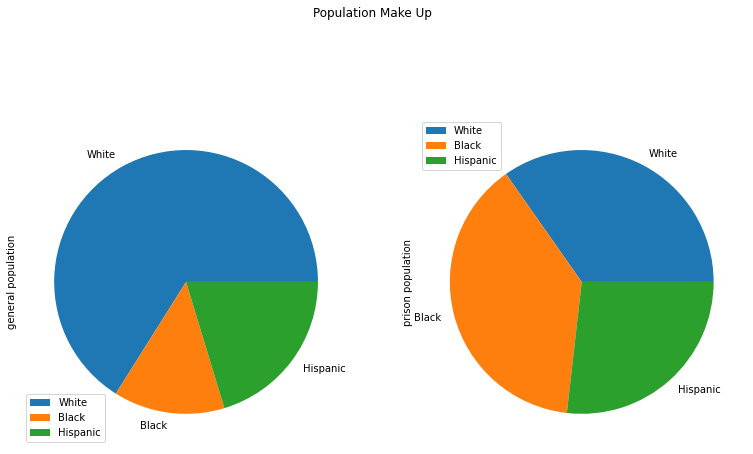

In [110]:
white = race_copy['White']
black = race_copy['Black']
hispanic = race_copy['Hispanic']
whiteprison = white[18] # year 2016
blackprison = black[18]
hispanicprison = hispanic[18]
whiteprison = int(whiteprison.replace(',', ''))
blackprison = int(blackprison.replace(',', ''))
hispanicprison = int(hispanicprison.replace(',', ''))

USA = diversity_copy['USA']
w = float(USA[28].replace('%', ''))
b = float(USA[29].replace('%', ''))
h = float(USA[37].replace('%', ''))

piechart = pd.DataFrame({'general population': [w, b, h],'prison population': [whiteprison, blackprison, hispanicprison]},index=['White', 'Black', 'Hispanic'])
plot = piechart.plot.pie(subplots=True, figsize=(13, 8), title='Population Make Up')

Text(0, 0.5, 'Percentage')

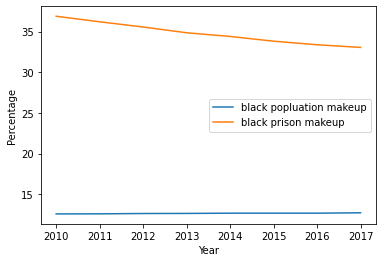

In [137]:
Total = race_copy['Total']
Black = race_copy['Black']
Total = Total.replace(',','', regex=True)
Black = Black.replace(',','', regex=True)
Total = pd.to_numeric(Total)
Black = pd.to_numeric(Black)
bprisonpercent = []
for i in range(10,10+len(Black)):
    bprisonpercent.append(Black[i]/Total[i]*100)
bprisonpercent = bprisonpercent[2:]

blackgeneral = []
blackgen = USdem['Black alone']
for i in range(len(blackgen)):
    blackgeneral.append(float(blackgen[i][-7:-2]))
blackgeneral = blackgeneral[:8]
    
blackpop_overall = pd.DataFrame({'black popluation makeup': blackgeneral,
                          'black prison makeup': bprisonpercent},
                          index=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
lgraph = blackpop_overall.plot.line()
lgraph.set_xlabel("Year")
lgraph.set_ylabel("Percentage")



<AxesSubplot:title={'center':'In a community of 100 people'}, xlabel='Race', ylabel='Amount of persons'>

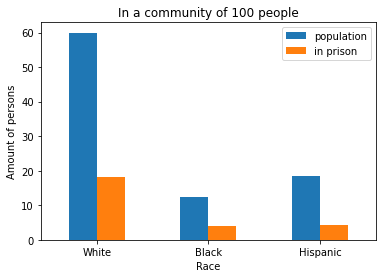

In [30]:
# makeup out of 100 citizen based on percentages
USA = diversity_copy['USA']
wpercent = float(USA[28].replace('%', ''))
bpercent = float(USA[29].replace('%', ''))
hpercent = float(USA[37].replace('%', ''))

citizens = [wpercent, bpercent, hpercent]

# pulling out number of citizens in 2016 
w = White[18]
b = Black[18]
h = Hispanic[18]
t = Total[18]

whundred = w/t * wpercent
bhundred = b/t * bpercent
hhundred = h/t * hpercent
inprison = [whundred, bhundred, hhundred]
citizens = [wpercent, bpercent, hpercent]

index = ['White', 'Black', 'Hispanic']
df = pd.DataFrame({'population': citizens,
                   'in prison': inprison}, index=index)
bgraph = df.plot.bar(rot=0, title='In a community of 100 people')
bgraph.set_xlabel("Race")
bgraph.set_ylabel("Amount of persons")
bgraph

Text(0, 0.5, 'Frequency')

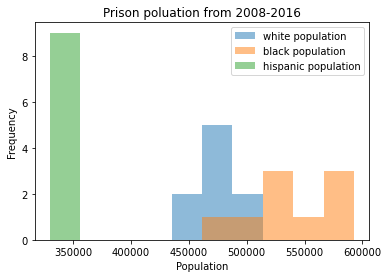

In [46]:
prisonpopulation = prisonpop.drop('total population', axis=1)
hist = prisonpopulation.plot(title='Prison poluation from 2008-2016',alpha=.5,kind="hist")
hist.set_xlabel("Population")
hist.set_ylabel("Frequency")

In [43]:
#df = pd.DataFrame({'length': [1.5, 0.5, 1.2, 0.9, 3],'width': [0.7, 0.2, 0.15, 0.2, 1.1]}, index=['pig', 'rabbit', 'duck', 'chicken', 'horse'])
#gpublic = float(USA[28].replace('%', ''))
#fincarcerated = float(USA[29].replace('%', ''))
prisonpol
#prisonpol['General public'] = pd.to_numeric(prisonpol['General public'])
#prisonpol['Formerly incarcerated'] = prisonpol['Formerly incarcerated'].replace('%', '')
#prisonpol['Formerly incarcerated'] = pd.to_numeric(prisonpol['Formerly incarcerated'])
#prisonpol.plot.hist(bins=12, alpha=0.5)

,Highest educational attainment,General public,Formerly incarcerated
0,No high school diploma or GED,13,25
1,High school diploma,28,20
2,GED,3,33
3,Some college,26,19
4,Bachelor’s degree or higher,29,4


## Data Sampling

Draw random some samples from your dataset(s)
(If you joined your dataset into one large dataset, only sample randomly from this large dataset)

You must describe how you choose to pick the random samples, i.e. systematic, probablistic sampling

You must describe if you draw random samples with or without replacement

Describe why or why not you chose to randomly draw samples with replacement or without replacement

## Find Probability
The probability of me being black and getting arrested.

The probability of me not getting arrested if I'm white.

The probability that I’ll be arrested.




## Testing Hypotheses

Will going to jail reduce my chances of getting a job?

Is me finishing school going to reduce my chances of ending up in jail?


### Note: Make sure to note the Null and the alternative hypotheses for each of the questions you want to test

## Test Statistics 
Am I more likely to be arrested than my white friend?

compare the black and white population

compare the black and white prison population

determine whom of the two races are more likely to be arrested

Is me finishing school going to reduce my chances of ending up in jail?

determine the percentages of black people with and without degrees.

determine the percentages of black people  in jail with and without degrees.



## Observed Values
Show the oberved value of the test statistics

# Hypothesis Tests Conclusions
Based on what you found about your topic communicate it to the audience. 

# Topic Conclusions
Sum up the conclusions about what you did and why it is interesting to you, the public reading your analysis or to a particular population